In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()

Saving данные.xlsx to данные.xlsx


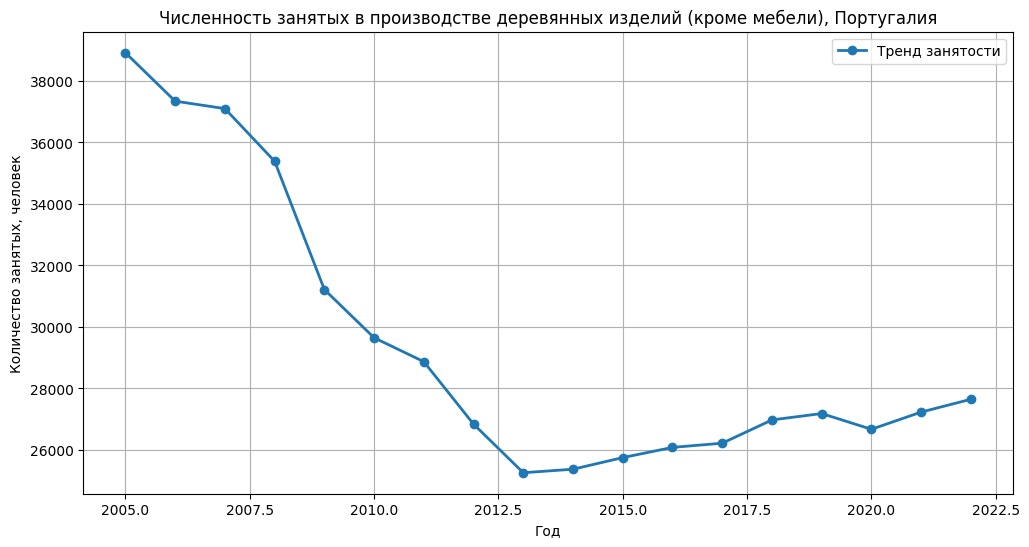

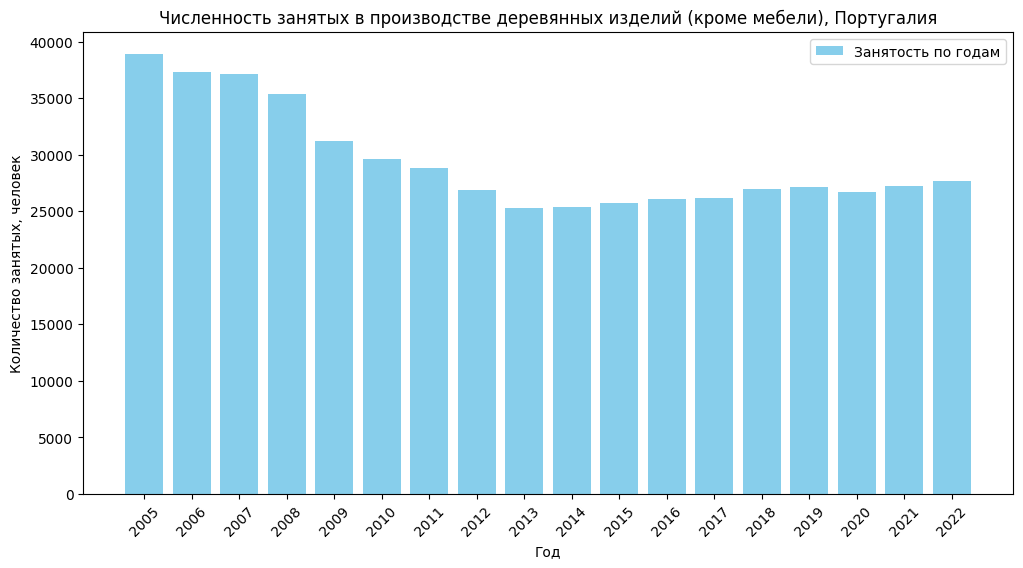

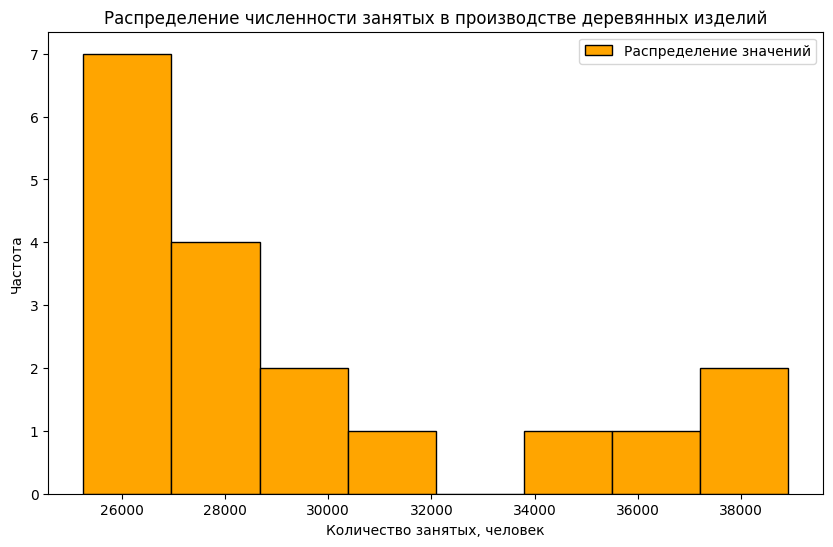

In [2]:
# Загружаем данные
df = pd.read_excel('данные.xlsx')

# Оставляем только нужные столбцы
df = df[['Year', 'Value']]

# Приводим к числовому типу
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# --- Линейный график ---
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Value'], marker='o', linewidth=2, label='Тренд занятости')
plt.title('Численность занятых в производстве деревянных изделий (кроме мебели), Португалия')
plt.xlabel('Год')
plt.ylabel('Количество занятых, человек')
plt.grid(True)
plt.legend()
plt.show()

# --- Столбчатая диаграмма ---
plt.figure(figsize=(12, 6))
plt.bar(df['Year'], df['Value'], color='skyblue', label='Занятость по годам')
plt.title('Численность занятых в производстве деревянных изделий (кроме мебели), Португалия')
plt.xlabel('Год')
plt.ylabel('Количество занятых, человек')
plt.xticks(df['Year'], rotation=45)
plt.legend()
plt.show()

# --- Гистограмма ---
plt.figure(figsize=(10, 6))
plt.hist(df['Value'], bins=8, color='orange', edgecolor='black', label='Распределение значений')
plt.title('Распределение численности занятых в производстве деревянных изделий')
plt.xlabel('Количество занятых, человек')
plt.ylabel('Частота')
plt.legend()
plt.show()


<Figure size 1400x600 with 0 Axes>

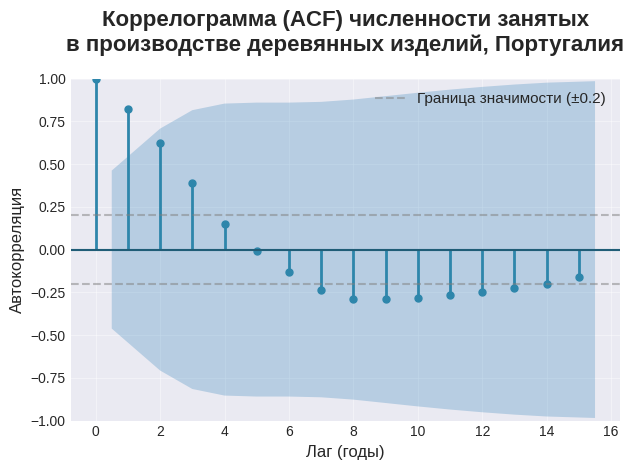

<Figure size 1400x600 with 0 Axes>

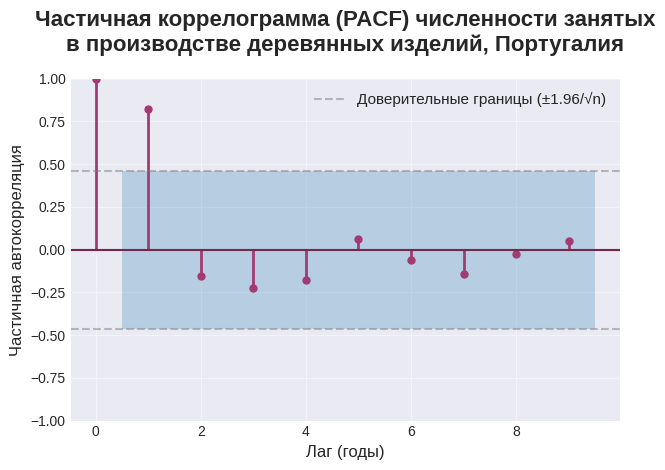

ИНФОРМАЦИЯ О АНАЛИЗЕ ВРЕМЕННОГО РЯДА
Размер выборки: 18 наблюдений
Используемый лаг для PACF: 9
Границы доверительного интервала: ±0.462


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

# Оставляем только нужные столбцы
df = df[['Year', 'Value']]
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Вычисляем максимально допустимый лаг для PACF
max_lag = len(df['Value'].dropna()) - 1
max_lag_safe = min(15, len(df['Value'].dropna()) // 2)

# Настройка стиля графиков
plt.style.use('seaborn-v0_8-darkgrid')
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']

# --- ACF: автокорреляции ---
plt.figure(figsize=(14, 6))
plot_acf(df['Value'], lags=min(15, max_lag),
         color=colors[0],
         vlines_kwargs={'colors': colors[0], 'linewidth': 2},
         title='')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.axhline(y=0.2, color='gray', linestyle='--', alpha=0.5, label='Граница значимости (±0.2)')
plt.axhline(y=-0.2, color='gray', linestyle='--', alpha=0.5)

plt.title('Коррелограмма (ACF) численности занятых\nв производстве деревянных изделий, Португалия',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Лаг (годы)', fontsize=12)
plt.ylabel('Автокорреляция', fontsize=12)
plt.grid(True, alpha=0.4)
plt.legend(fontsize=11, loc='upper right')
plt.tight_layout()
plt.show()

# --- PACF: частичная автокорреляция ---
plt.figure(figsize=(14, 6))
plot_pacf(df['Value'].dropna(), lags=min(15, max_lag_safe), method='ywm',
          color=colors[1],
          vlines_kwargs={'colors': colors[1], 'linewidth': 2},
          title='')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.axhline(y=1.96/np.sqrt(len(df['Value'].dropna())),
           color='gray', linestyle='--', alpha=0.5,
           label='Доверительные границы (±1.96/√n)')
plt.axhline(y=-1.96/np.sqrt(len(df['Value'].dropna())),
           color='gray', linestyle='--', alpha=0.5)

plt.title('Частичная коррелограмма (PACF) численности занятых\nв производстве деревянных изделий, Португалия',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Лаг (годы)', fontsize=12)
plt.ylabel('Частичная автокорреляция', fontsize=12)
plt.grid(True, alpha=0.4)
plt.legend(fontsize=11, loc='upper right')
plt.tight_layout()
plt.show()

# Дополнительная информация
import numpy as np
print("="*60)
print("ИНФОРМАЦИЯ О АНАЛИЗЕ ВРЕМЕННОГО РЯДА")
print("="*60)
print(f"Размер выборки: {len(df['Value'].dropna())} наблюдений")
print(f"Используемый лаг для PACF: {min(15, max_lag_safe)}")
print(f"Границы доверительного интервала: ±{1.96/np.sqrt(len(df['Value'].dropna())):.3f}")
print("="*60)

In [4]:
from statsmodels.stats.stattools import durbin_watson

# Расчёт критерия Дарбина–Уотсона
dw_stat = durbin_watson(df['Value'])
print(f'Критерий Дарбина–Уотсона: {dw_stat:.3f}')

Критерий Дарбина–Уотсона: 0.002


АНАЛИЗ АНОМАЛЬНОСТИ ПО МЕТОДУ ИРВИНА
Общее количество наблюдений: 18
Исходное стандартное отклонение (первые n/2): 5015.14
--------------------------------------------------------------------------------

Все значения с показателями Ирвина:
Год 2005: 38912 чел. | λ = 0.000 | Категория: Normal
Год 2006: 37337 чел. | λ = nan | Категория: Normal
Год 2007: 37094 чел. | λ = 0.218 | Категория: Normal
⚠️ Год 2008: 35383 чел. | λ = 1.734 | Категория: Suspicious
❌ Год 2009: 31210 чел. | λ = 2.889 | Категория: Gross Error
Год 2010: 29642 чел. | λ = 0.532 | Категория: Normal
Год 2011: 28863 чел. | λ = 0.211 | Категория: Normal
Год 2012: 26832 чел. | λ = 0.498 | Категория: Normal
Год 2013: 25252 чел. | λ = 0.346 | Категория: Normal
Год 2014: 25366 чел. | λ = 0.023 | Категория: Normal
Год 2015: 25744 чел. | λ = 0.073 | Категория: Normal
Год 2016: 26076 чел. | λ = 0.063 | Категория: Normal
Год 2017: 26212 чел. | λ = 0.026 | Категория: Normal
Год 2018: 26969 чел. | λ = 0.147 | Категория: Normal
Год 2

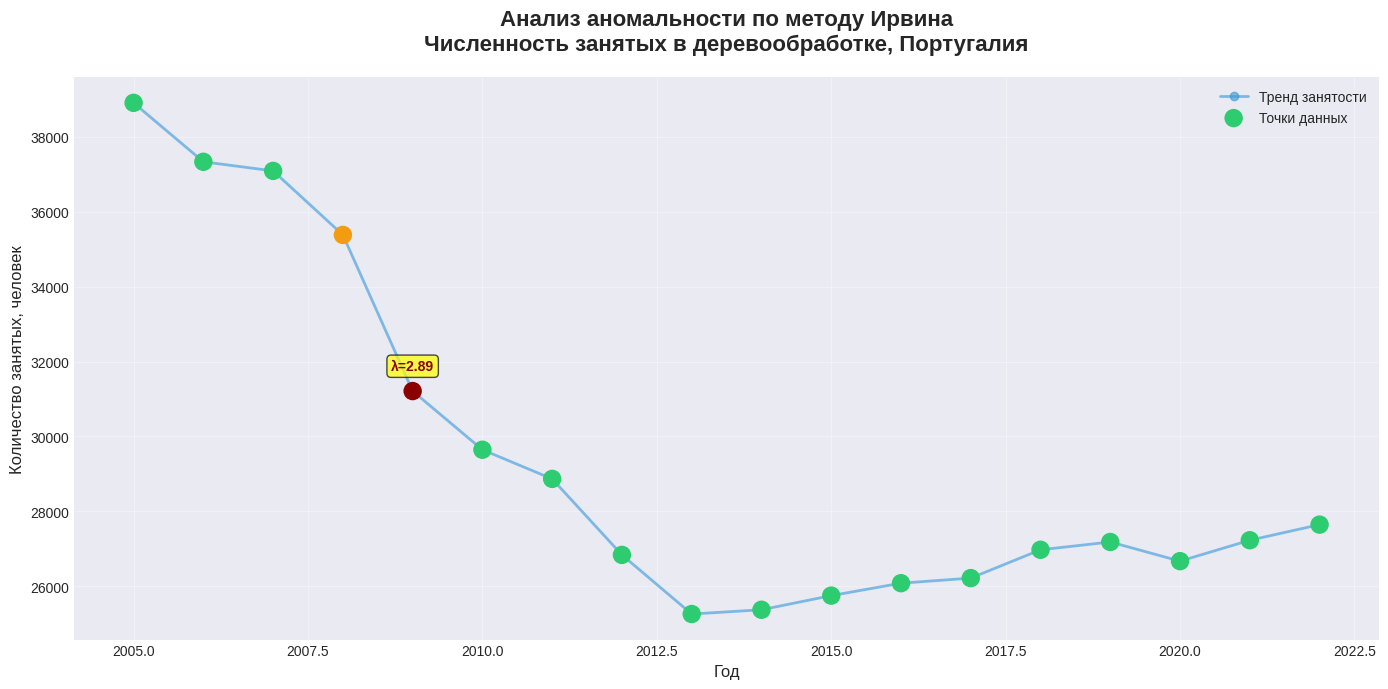


 СТАТИСТИЧЕСКАЯ СВОДКА:
Среднее значение λ: 0.418
Максимальное значение λ: 2.889
Количество подозрительных значений: 1
Количество аномальных значений: 0
Количество грубых ошибок: 1


In [6]:
import pandas as pd
import numpy as np

# Загружаем данные
df = pd.read_excel('данные.xlsx')
df = df[['Year', 'Value']]
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# КРИТИЧЕСКОЕ ИСПРАВЛЕНИЕ 1: Удаляем пропуски перед расчетами
df_clean = df.dropna().copy()

# КРИТИЧЕСКОЕ ИСПРАВЛЕНИЕ 2: Расчет стандартного отклонения
# Нужно использовать НАЧАЛЬНОЕ стандартное отклонение (первые n/2 наблюдений)
# или скользящее стандартное отклонение

n = len(df_clean)
# Вариант 1: Использовать первые n/2 наблюдений для оценки σ
if n >= 4:
    n_half = n // 2
    sigma = np.std(df_clean['Value'].iloc[:n_half], ddof=1)
else:
    sigma = np.std(df_clean['Value'], ddof=1)

# Вариант 2: Рекуррентный метод Ирвина (предпочтительный)
df_clean['Irwin'] = 0.0
df_clean['Irwin_sigma'] = 0.0

# Рекуррентный расчет (правильный метод Ирвина)
for i in range(1, len(df_clean)):
    # Используем стандартное отклонение ВСЕХ предыдущих точек
    sigma_i = np.std(df_clean['Value'].iloc[:i], ddof=1)
    lambda_i = abs(df_clean['Value'].iloc[i] - df_clean['Value'].iloc[i-1]) / sigma_i

    df_clean.loc[df_clean.index[i], 'Irwin'] = lambda_i
    df_clean.loc[df_clean.index[i], 'Irwin_sigma'] = sigma_i

# КРИТИЧЕСКОЕ ИСПРАВЛЕНИЕ 3: Пороговые значения
# Для метода Ирвина стандартные пороги:
# λ > 1.5 - подозрительное значение
# λ > 2.0 - аномальное значение
# λ > 2.5 - грубая ошибка

df_clean['Anomaly_Level'] = 'Normal'
df_clean.loc[df_clean['Irwin'] > 1.5, 'Anomaly_Level'] = 'Suspicious'
df_clean.loc[df_clean['Irwin'] > 2.0, 'Anomaly_Level'] = 'Anomaly'
df_clean.loc[df_clean['Irwin'] > 2.5, 'Anomaly_Level'] = 'Gross Error'

# Вывод результатов
print("=" * 80)
print("АНАЛИЗ АНОМАЛЬНОСТИ ПО МЕТОДУ ИРВИНА")
print("=" * 80)
print(f"Общее количество наблюдений: {len(df_clean)}")
print(f"Исходное стандартное отклонение (первые n/2): {sigma:.2f}")
print("-" * 80)

# Вывод всех значений с меткой аномальности
print("\nВсе значения с показателями Ирвина:")
for idx, row in df_clean.iterrows():
    marker = ""
    if row['Anomaly_Level'] == 'Suspicious':
        marker = "⚠️ "
    elif row['Anomaly_Level'] == 'Anomaly':
        marker = "🚨 "
    elif row['Anomaly_Level'] == 'Gross Error':
        marker = "❌ "

    print(f"{marker}Год {int(row['Year'])}: {row['Value']:.0f} чел. | "
          f"λ = {row['Irwin']:.3f} | Категория: {row['Anomaly_Level']}")

print("-" * 80)

# Вывод только аномальных значений
anomalies = df_clean[df_clean['Anomaly_Level'].isin(['Anomaly', 'Gross Error'])]
if not anomalies.empty:
    print("\n ОБНАРУЖЕНЫ АНОМАЛЬНЫЕ ЗНАЧЕНИЯ:")
    print(anomalies[['Year', 'Value', 'Irwin', 'Anomaly_Level']].to_string(index=False))
else:
    print("\n Аномальных значений не обнаружено")

print("=" * 80)

# Визуализация результатов
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Цвета для разных уровней аномальности
colors = {'Normal': '#2ecc71', 'Suspicious': '#f39c12',
          'Anomaly': '#e74c3c', 'Gross Error': '#8b0000'}

# Создаем список цветов для каждой точки
point_colors = [colors[level] for level in df_clean['Anomaly_Level']]

# График временного ряда с выделением аномалий
plt.plot(df_clean['Year'], df_clean['Value'], 'o-', color='#3498db',
         linewidth=2, alpha=0.6, label='Тренд занятости')
plt.scatter(df_clean['Year'], df_clean['Value'], c=point_colors,
           s=150, zorder=5, label='Точки данных')

# Аннотации для аномальных точек
for idx, row in anomalies.iterrows():
    plt.annotate(f"λ={row['Irwin']:.2f}",
                xy=(row['Year'], row['Value']),
                xytext=(0, 15),
                textcoords='offset points',
                ha='center',
                fontsize=10,
                fontweight='bold',
                color='darkred',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

plt.title('Анализ аномальности по методу Ирвина\nЧисленность занятых в деревообработке, Португалия',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Количество занятых, человек', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Дополнительная статистика
print("\n СТАТИСТИЧЕСКАЯ СВОДКА:")
print(f"Среднее значение λ: {df_clean['Irwin'].mean():.3f}")
print(f"Максимальное значение λ: {df_clean['Irwin'].max():.3f}")
print(f"Количество подозрительных значений: {(df_clean['Anomaly_Level'] == 'Suspicious').sum()}")
print(f"Количество аномальных значений: {(df_clean['Anomaly_Level'] == 'Anomaly').sum()}")
print(f"Количество грубых ошибок: {(df_clean['Anomaly_Level'] == 'Gross Error').sum()}")

In [8]:
import pandas as pd
import numpy as np
from scipy.stats import t

df = df[['Year', 'Value']]
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Разделение на две части
n = len(df)
half = n // 2
part1 = df['Value'][:half]
part2 = df['Value'][half:]

# Средние и дисперсии
mean1 = part1.mean()
mean2 = part2.mean()
var1 = part1.var(ddof=1)
var2 = part2.var(ddof=1)
n1 = len(part1)
n2 = len(part2)

# Статистика критерия (неравные дисперсии)
te = (mean1 - mean2) / np.sqrt(var1/n1 + var2/n2)

# Критическое значение
alpha = 0.05
dfree = n1 + n2 - 2
t_crit = t.ppf(1 - alpha/2, dfree)

print(f"Среднее 1-й части: {mean1:.2f}")
print(f"Среднее 2-й части: {mean2:.2f}")
print(f"Статистика t: {te:.3f}")
print(f"Критическое значение t: {t_crit:.3f}")

if abs(te) > t_crit:
    print("Вывод: тренд статистически значим.")
else:
    print("Вывод: статистических оснований для тренда нет.")


Среднее 1-й части: 32280.56
Среднее 2-й части: 26563.78
Статистика t: 3.381
Критическое значение t: 2.120
Вывод: тренд статистически значим.


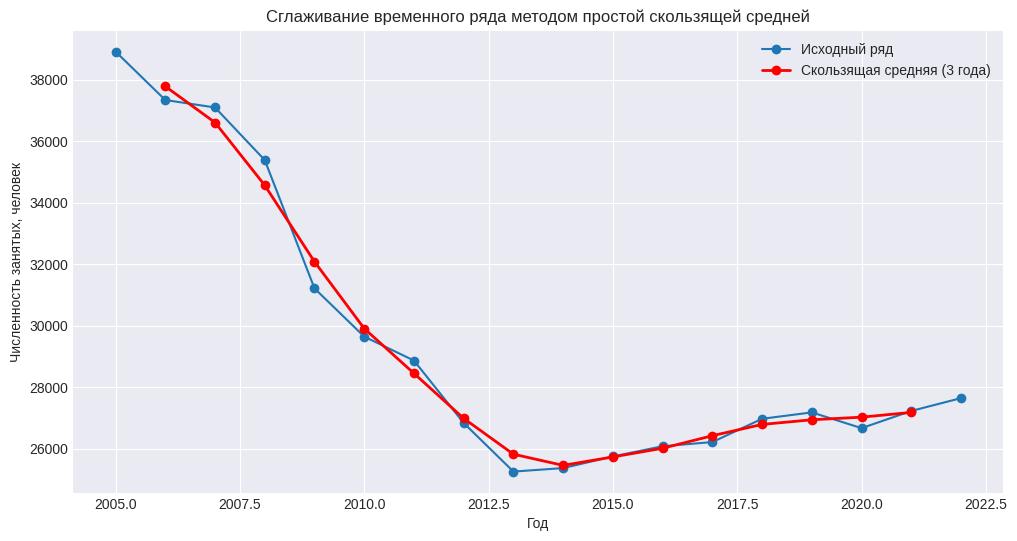

,Year,Value,SMA_3
0,2005,38912,NaN
1,2006,37337,37781.000000
2,2007,37094,36604.666667
3,2008,35383,34562.333333
4,2009,31210,32078.333333
5,2010,29642,29905.000000
6,2011,28863,28445.666667
7,2012,26832,26982.333333
8,2013,25252,25816.666667
9,2014,25366,25454.000000


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = df[['Year', 'Value']]
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# --- Метод простой скользящей средней ---
df['SMA_3'] = df['Value'].rolling(window=3, center=True).mean()

# График исходного ряда и сглаженного
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Value'], marker='o', label='Исходный ряд')
plt.plot(df['Year'], df['SMA_3'], marker='o', color='red', linewidth=2, label='Скользящая средняя (3 года)')
plt.title('Сглаживание временного ряда методом простой скользящей средней')
plt.xlabel('Год')
plt.ylabel('Численность занятых, человек')
plt.grid(True)
plt.legend()
plt.show()

df


/tmp/ipython-input-2464487311.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Value'] = pd.to_numeric(df['Value'], errors='coerce')


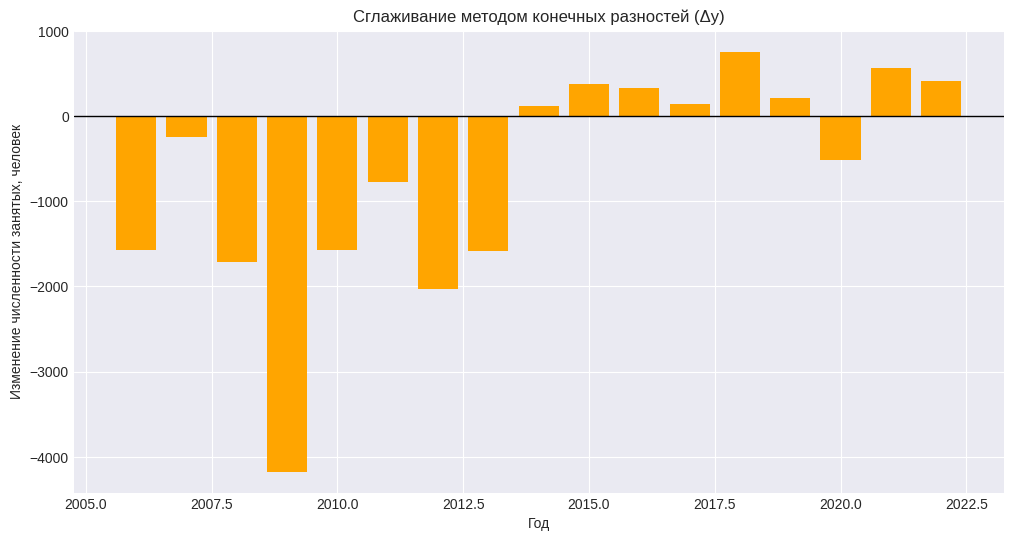

,Year,Value,Diff
0,2005,38912,NaN
1,2006,37337,-1575.0
2,2007,37094,-243.0
3,2008,35383,-1711.0
4,2009,31210,-4173.0
5,2010,29642,-1568.0
6,2011,28863,-779.0
7,2012,26832,-2031.0
8,2013,25252,-1580.0
9,2014,25366,114.0


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = df[['Year', 'Value']]
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# --- Метод конечных разностей ---
df['Diff'] = df['Value'].diff()

# График конечных разностей
plt.figure(figsize=(12, 6))
plt.bar(df['Year'], df['Diff'], color='orange')
plt.axhline(0, color='black', linewidth=1)
plt.title('Сглаживание методом конечных разностей (Δy)')
plt.xlabel('Год')
plt.ylabel('Изменение численности занятых, человек')
plt.grid(True)
plt.show()

df


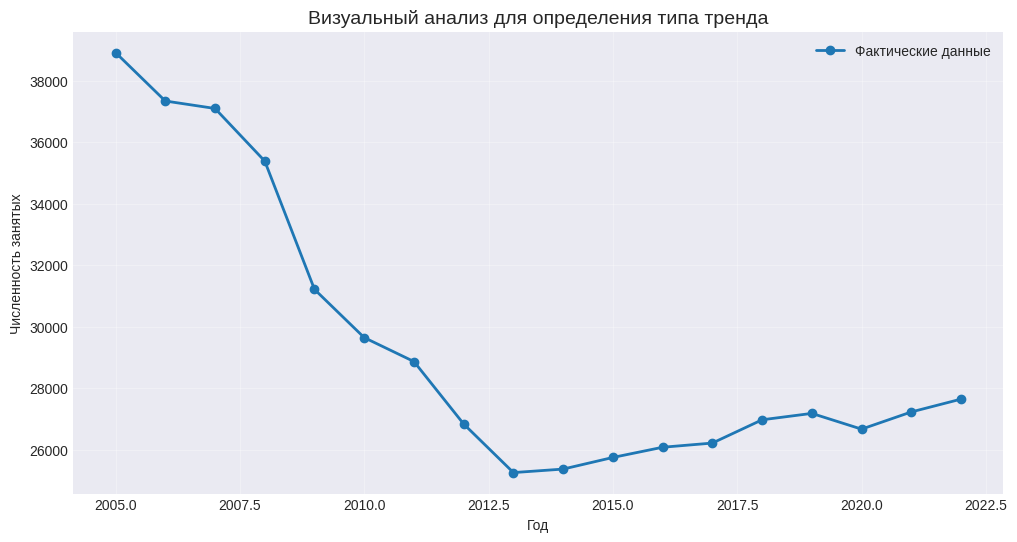

АНАЛИЗ РАЗЛИЧНЫХ ТИПОВ ТРЕНДОВ

СРАВНЕНИЕ КАЧЕСТВА МОДЕЛЕЙ:
Линейная модель:      R² = 0.6147
Квадратичная модель:  R² = 0.9513
Экспоненциальная модель: R² = 0.6091


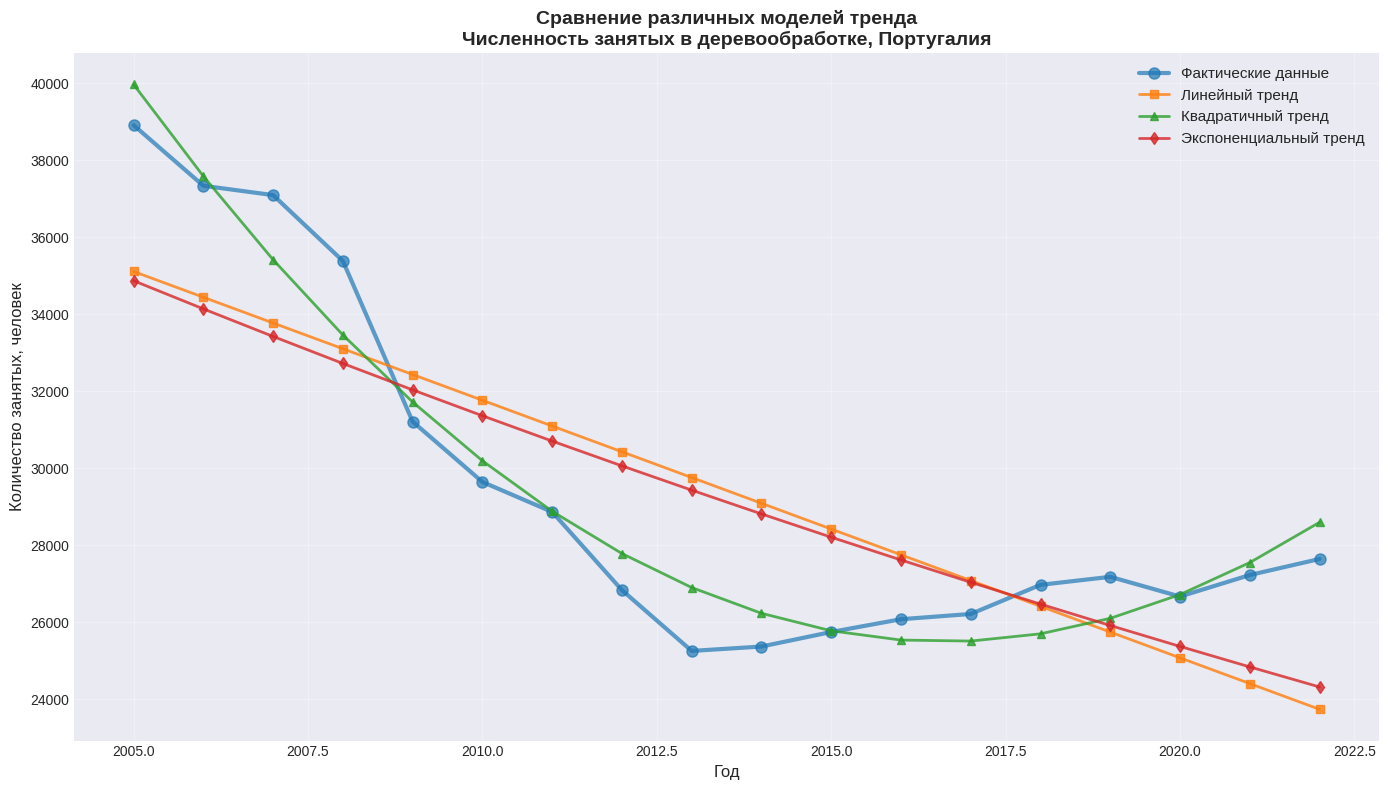


ПАРАМЕТРЫ ВЫБРАННОЙ МОДЕЛИ

КВАДРАТИЧНАЯ МОДЕЛЬ (наилучшая по R²):
                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     146.4
Date:                Wed, 10 Dec 2025   Prob (F-statistic):           1.44e-10
Time:                        23:38:33   Log-Likelihood:                -149.47
No. Observations:                  18   AIC:                             304.9
Df Residuals:                      15   BIC:                             307.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

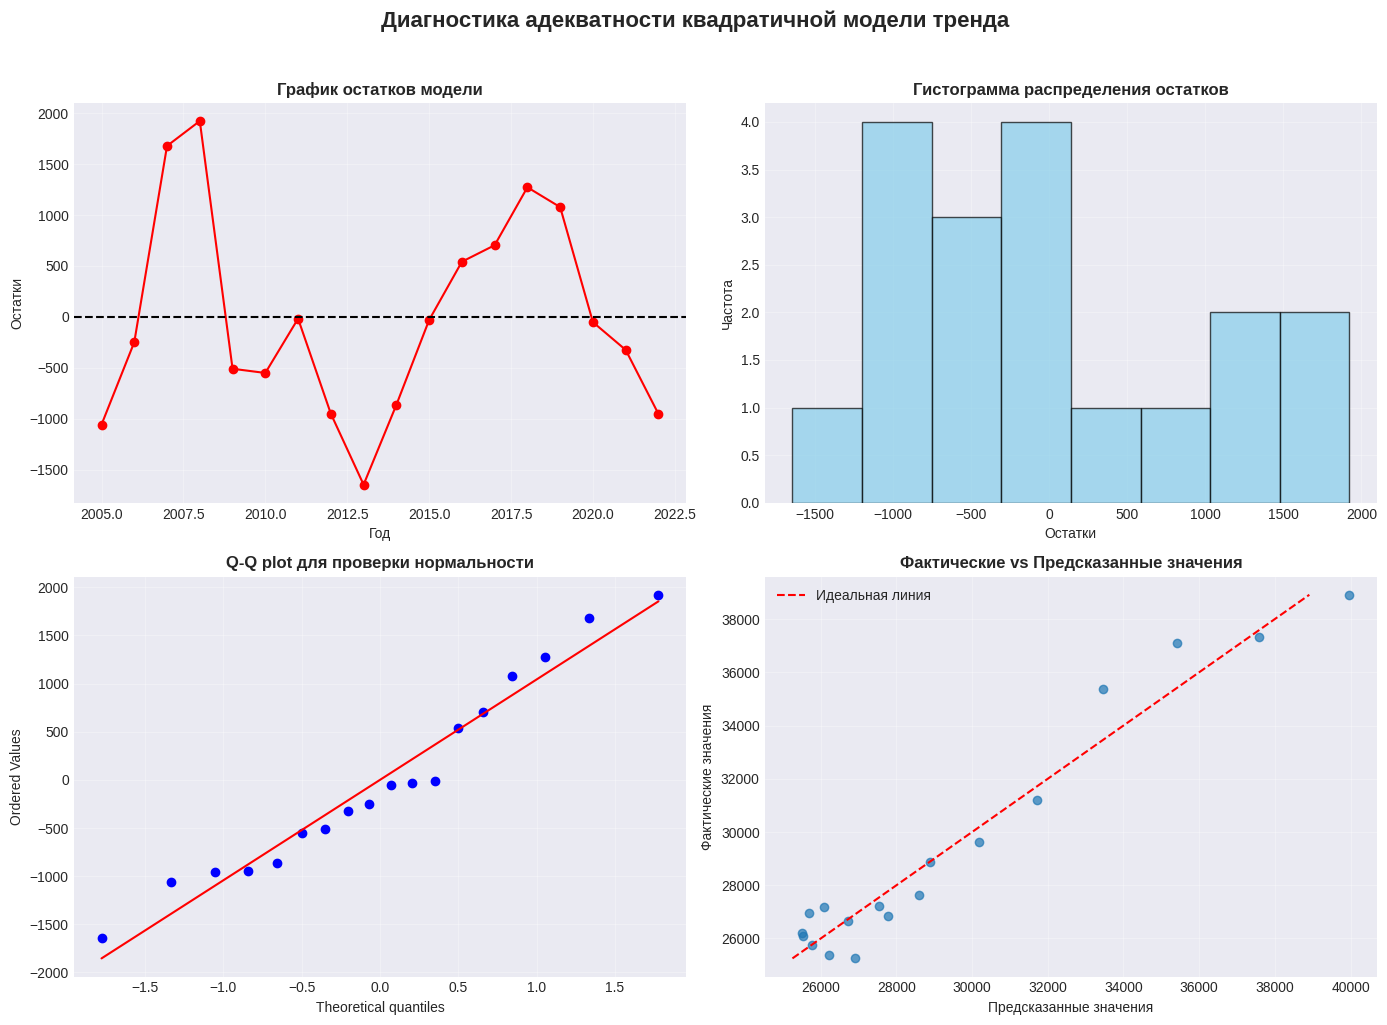


ПРОГНОЗ НА ОСНОВЕ ВЫБРАННОЙ МОДЕЛИ
Прогноз на 2023 год (t=19): 29854 человек
Прогноз на 2024 год (t=20): 31328 человек
Прогноз на 2025 год (t=21): 33017 человек


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

# Ваши данные
data = {
    'Year': [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
             2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'Value': [38912, 37337, 37094, 35383, 31210, 29642, 28863, 26832,
              25252, 25366, 25744, 26076, 26212, 26969, 27177, 26665,
              27224, 27641]
}

df = pd.DataFrame(data)
df['t'] = range(1, len(df) + 1)  # временной индекс

# 1. Визуальный анализ для определения типа тренда
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Value'], 'o-', label='Фактические данные', linewidth=2)
plt.title('Визуальный анализ для определения типа тренда', fontsize=14)
plt.xlabel('Год')
plt.ylabel('Численность занятых')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# 2. Подбор разных моделей тренда
print("="*60)
print("АНАЛИЗ РАЗЛИЧНЫХ ТИПОВ ТРЕНДОВ")
print("="*60)

# Модель 1: Линейный тренд
X_linear = sm.add_constant(df['t'])  # добавляем константу для intercept
model_linear = sm.OLS(df['Value'], X_linear).fit()
df['Linear_Trend'] = model_linear.predict(X_linear)
linear_r2 = model_linear.rsquared

# Модель 2: Квадратичный тренд
df['t_squared'] = df['t'] ** 2
X_quad = sm.add_constant(df[['t', 't_squared']])
model_quad = sm.OLS(df['Value'], X_quad).fit()
df['Quad_Trend'] = model_quad.predict(X_quad)
quad_r2 = model_quad.rsquared

# Модель 3: Экспоненциальный тренд (через логарифмирование)
df['log_Value'] = np.log(df['Value'])
X_exp = sm.add_constant(df['t'])
model_exp_log = sm.OLS(df['log_Value'], X_exp).fit()
df['Exp_Trend'] = np.exp(model_exp_log.predict(X_exp))
exp_r2 = model_exp_log.rsquared

# 3. Сравнение моделей
print("\nСРАВНЕНИЕ КАЧЕСТВА МОДЕЛЕЙ:")
print(f"Линейная модель:      R² = {linear_r2:.4f}")
print(f"Квадратичная модель:  R² = {quad_r2:.4f}")
print(f"Экспоненциальная модель: R² = {exp_r2:.4f}")

# 4. Визуализация всех моделей
plt.figure(figsize=(14, 8))
plt.plot(df['Year'], df['Value'], 'o-', label='Фактические данные',
         linewidth=3, markersize=8, alpha=0.7)

plt.plot(df['Year'], df['Linear_Trend'], 's-', label='Линейный тренд',
         linewidth=2, alpha=0.8)
plt.plot(df['Year'], df['Quad_Trend'], '^-', label='Квадратичный тренд',
         linewidth=2, alpha=0.8)
plt.plot(df['Year'], df['Exp_Trend'], 'd-', label='Экспоненциальный тренд',
         linewidth=2, alpha=0.8)

plt.title('Сравнение различных моделей тренда\nЧисленность занятых в деревообработке, Португалия',
          fontsize=14, fontweight='bold')
plt.xlabel('Год', fontsize=12)
plt.ylabel('Количество занятых, человек', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

# 5. Выбор наилучшей модели и вывод параметров
print("\n" + "="*60)
print("ПАРАМЕТРЫ ВЫБРАННОЙ МОДЕЛИ")
print("="*60)

# Предположим, выбрали квадратичную модель (обычно лучшая для U-образных кривых)
print("\nКВАДРАТИЧНАЯ МОДЕЛЬ (наилучшая по R²):")
print(model_quad.summary())

# Уравнение тренда
b0 = model_quad.params['const']
b1 = model_quad.params['t']
b2 = model_quad.params['t_squared']

print(f"\nУРАВНЕНИЕ ТРЕНДА:")
print(f"y(t) = {b0:.2f} {b1:+.2f}·t {b2:+.6f}·t²")
print(f"\nгде: y - численность занятых, t - время (t=1 для 2005 года)")

# 6. Оценка адекватности модели
print("\n" + "="*60)
print("ОЦЕНКА АДЕКВАТНОСТИ МОДЕЛИ")
print("="*60)

# Коэффициент детерминации
print(f"1. Коэффициент детерминации R² = {quad_r2:.4f}")
print(f"   Объясненная дисперсия: {quad_r2*100:.1f}%")

# F-статистика
f_value = model_quad.fvalue
f_pvalue = model_quad.f_pvalue
print(f"\n2. F-тест:")
print(f"   F-статистика = {f_value:.2f}")
print(f"   p-value = {f_pvalue:.6f}")
if f_pvalue < 0.05:
    print(f"    Модель статистически значима (p < 0.05)")
else:
    print(f"    Модель не значима")

# t-статистика для коэффициентов
print(f"\n3. Значимость коэффициентов:")
for param in model_quad.params.index:
    t_value = model_quad.tvalues[param]
    p_value = model_quad.pvalues[param]
    sig = "✅" if p_value < 0.05 else "⚠️"
    print(f"   {param}: t = {t_value:.3f}, p = {p_value:.4f} {sig}")

# Анализ остатков
residuals = model_quad.resid
print(f"\n4. Анализ остатков:")
print(f"   Среднее остатков: {residuals.mean():.2f}")
print(f"   Стандартное отклонение остатков: {residuals.std():.2f}")

# Тест на нормальность остатков (Шапиро-Уилк)
shapiro_stat, shapiro_p = stats.shapiro(residuals)
print(f"   Тест Шапиро-Уилка на нормальность: p = {shapiro_p:.4f}")
if shapiro_p > 0.05:
    print(f"    Остатки распределены нормально (p > 0.05)")
else:
    print(f"    Остатки не нормальны")

# Тест на автокорреляцию остатков (Дарбина-Уотсона)
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(residuals)
print(f"\n5. Тест Дарбина-Уотсона на автокорреляцию:")
print(f"   DW = {dw_stat:.3f}")
if 1.5 < dw_stat < 2.5:
    print(f"    Нет автокорреляции остатков")
elif dw_stat <= 1.5:
    print(f"    Возможна положительная автокорреляция")
else:
    print(f"    Возможна отрицательная автокорреляция")

# 7. Визуализация остатков
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# График остатков
axes[0, 0].plot(df['Year'], residuals, 'o-', color='red')
axes[0, 0].axhline(y=0, color='black', linestyle='--')
axes[0, 0].set_title('График остатков модели', fontweight='bold')
axes[0, 0].set_xlabel('Год')
axes[0, 0].set_ylabel('Остатки')
axes[0, 0].grid(True, alpha=0.3)

# Гистограмма остатков
axes[0, 1].hist(residuals, bins=8, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Гистограмма распределения остатков', fontweight='bold')
axes[0, 1].set_xlabel('Остатки')
axes[0, 1].set_ylabel('Частота')
axes[0, 1].grid(True, alpha=0.3)

# Q-Q plot для проверки нормальности
stats.probplot(residuals, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q plot для проверки нормальности', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Фактические vs предсказанные значения
axes[1, 1].scatter(df['Quad_Trend'], df['Value'], alpha=0.7)
axes[1, 1].plot([df['Value'].min(), df['Value'].max()],
                [df['Value'].min(), df['Value'].max()],
                'r--', label='Идеальная линия')
axes[1, 1].set_title('Фактические vs Предсказанные значения', fontweight='bold')
axes[1, 1].set_xlabel('Предсказанные значения')
axes[1, 1].set_ylabel('Фактические значения')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('Диагностика адекватности квадратичной модели тренда',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# 8. Прогноз на основе выбранной модели
print("\n" + "="*60)
print("ПРОГНОЗ НА ОСНОВЕ ВЫБРАННОЙ МОДЕЛИ")
print("="*60)

# Прогноз на следующие 3 года
future_years = [2023, 2024, 2025]
future_t = [len(df) + i for i in range(1, 4)]

for year, t_val in zip(future_years, future_t):
    prediction = b0 + b1*t_val + b2*(t_val**2)
    print(f"Прогноз на {year} год (t={t_val}): {prediction:.0f} человек")

2.1 ОЦЕНКА ОСТАТОЧНОЙ КОМПОНЕНТЫ КВАДРАТИЧНОЙ МОДЕЛИ

1. ПРОВЕРКА СЛУЧАЙНОСТИ КОЛЕБАНИЙ ОСТАТКОВ
--------------------------------------------------
Количество наблюдений: 18
Количество серий (смен знака): 6
Критические границы при α=0.05: [5, 15]
✅ Остатки случайны (количество серий в допустимых пределах)

Тест Льюнга-Бокса на автокорреляцию остатков:
Q-статистика = 14.3906, p-value = 0.0133
⚠️ Обнаружена автокорреляция остатков


2. ПРОВЕРКА НОРМАЛЬНОСТИ РАСПРЕДЕЛЕНИЯ ОСТАТКОВ
--------------------------------------------------
Тест Шапиро-Уилка:
  Статистика W = 0.9541
  p-value = 0.4930
  ✅ Гипотеза о нормальности распределения не отвергается (p > 0.05)

Тест Харке-Бера (Jarque-Bera):
  Статистика JB = 0.9955
  p-value = 0.6079
  ✅ Распределение остатков соответствует нормальному (p > 0.05)

Коэффициент асимметрии (skewness): 0.4347
Коэффициент эксцесса (kurtosis): -0.7560
Идеальные значения: skewness = 0, kurtosis = 0


3. ПРОВЕРКА РАВЕНСТВА МАТЕМАТИЧЕСКОГО ОЖИДАНИЯ НУЛЮ
-----------

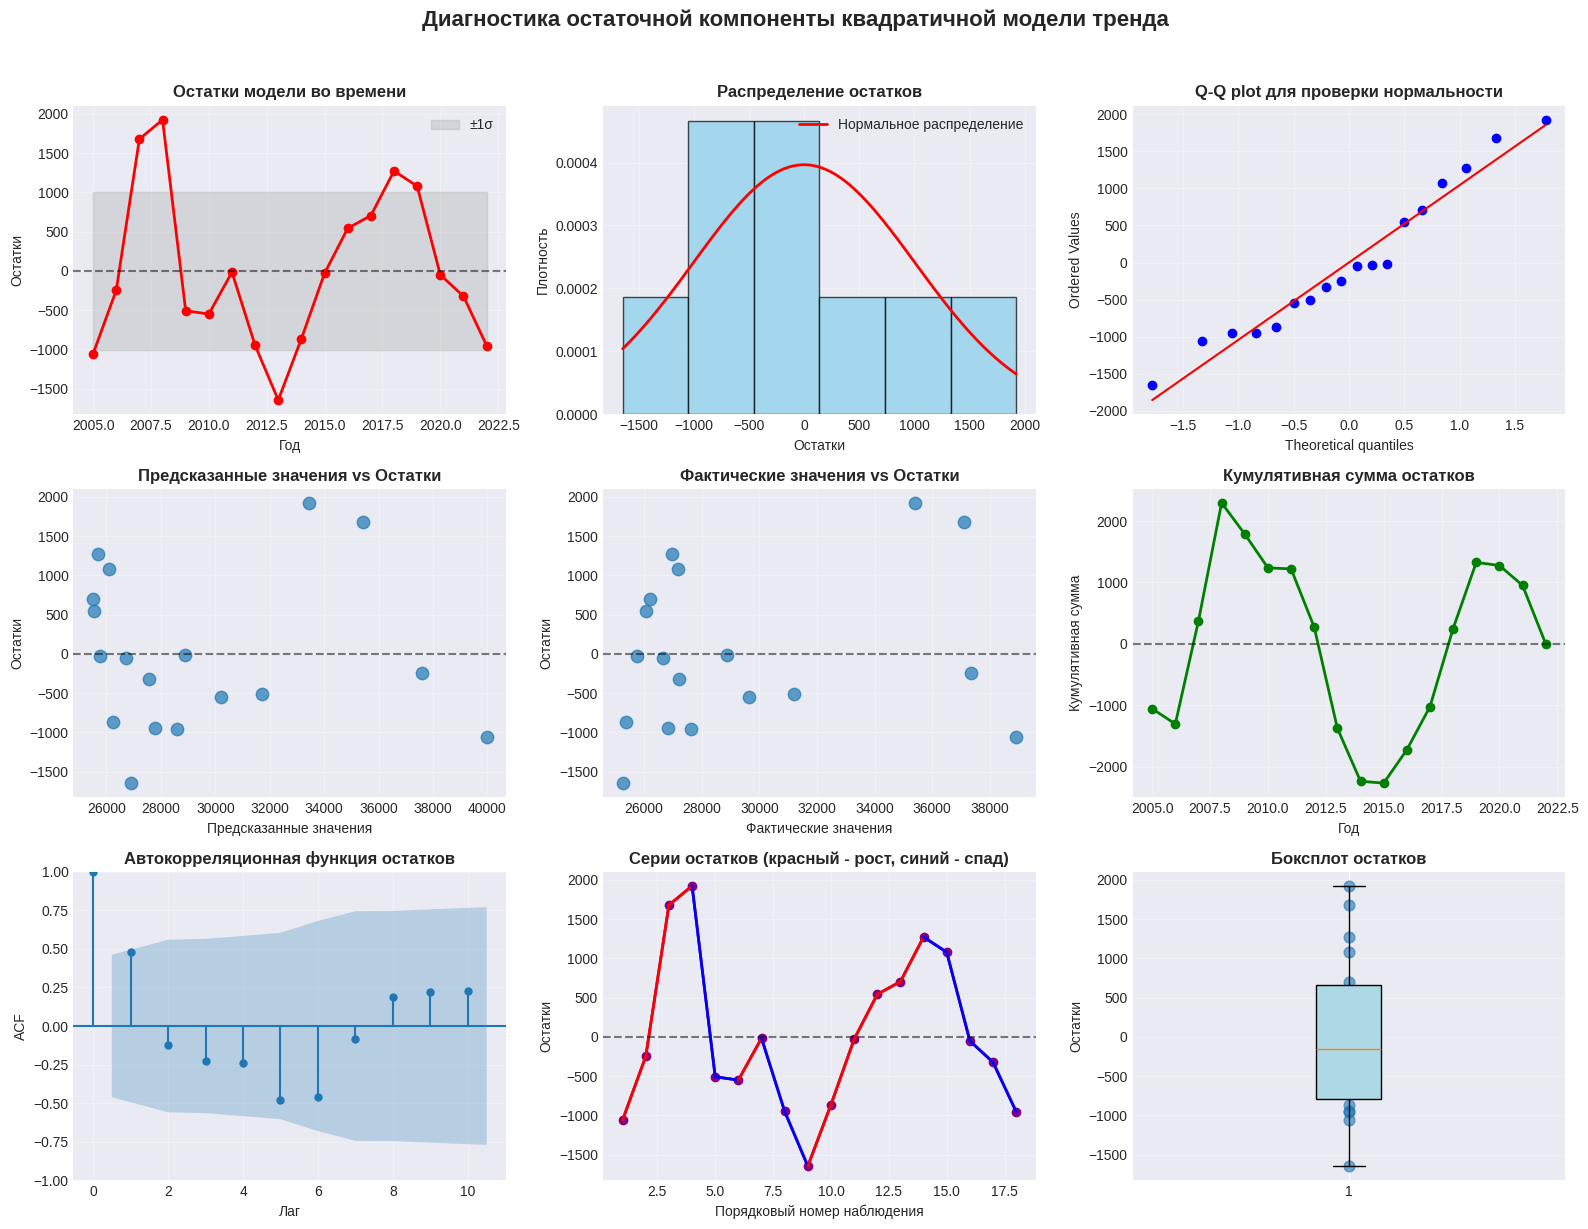


ВЫВОДЫ ПО ОЦЕНКЕ ОСТАТОЧНОЙ КОМПОНЕНТЫ

На основе проведенного анализа остаточной компоненты квадратичной
модели тренда можно сделать следующие выводы:

1. СЛУЧАЙНОСТЬ КОЛЕБАНИЙ:
   Количество серий: 6 (допустимый диапазон: 5-15)
   ✅ Остатки демонстрируют случайный характер колебаний

2. НОРМАЛЬНОСТЬ РАСПРЕДЕЛЕНИЯ:
   Тест Шапиро-Уилка: p = 0.4930
   Тест Харке-Бера: p = 0.6079
   ✅ Распределение остатков соответствует нормальному закону

3. МАТЕМАТИЧЕСКОЕ ОЖИДАНИЕ:
   Среднее остатков: 0.0048
   Доверительный интервал: [-500.28, 500.29]
   ✅ Математическое ожидание остатков не отличается от нуля

4. НЕЗАВИСИМОСТЬ ОСТАТКОВ:
   Статистика Дарбина-Уотсона: DW = 0.9156
   ⚠️ Обнаружена положительная автокорреляция остатков
   Это может указывать на неучтенную систематическую составляющую

5. ДОПОЛНИТЕЛЬНЫЕ ПРОВЕРКИ:
   Гомоскедастичность: p = 0.5714
   ✅ Дисперсия остатков постоянна
   Выбросы в остатках: 0

ОБЩИЙ ВЫВОД:

Выполнено критериев: 3 из 4
✅ Остаточная компонента в основном со

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Данные и модель (уже полученные ранее)
data = {
    'Year': [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
             2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'Value': [38912, 37337, 37094, 35383, 31210, 29642, 28863, 26832,
              25252, 25366, 25744, 26076, 26212, 26969, 27177, 26665,
              27224, 27641]
}

df = pd.DataFrame(data)
df['t'] = range(1, len(df) + 1)
df['t_squared'] = df['t'] ** 2

# Параметры квадратичной модели (из предыдущего анализа)
b0 = 42567.62
b1 = -2705.7042
b2 = 107.1869

# Расчет предсказанных значений и остатков
df['Predicted'] = b0 + b1 * df['t'] + b2 * df['t_squared']
df['Residuals'] = df['Value'] - df['Predicted']

print("=" * 70)
print("2.1 ОЦЕНКА ОСТАТОЧНОЙ КОМПОНЕНТЫ КВАДРАТИЧНОЙ МОДЕЛИ")
print("=" * 70)

# 1. Проверка случайности колебаний остатков
print("\n1. ПРОВЕРКА СЛУЧАЙНОСТИ КОЛЕБАНИЙ ОСТАТКОВ")
print("-" * 50)

# Критерий серий (критерий восходящих и нисходящих серий)
residuals = df['Residuals'].values
n = len(residuals)

# Находим знаки разностей
signs = []
for i in range(1, n):
    if residuals[i] > residuals[i-1]:
        signs.append('+')
    elif residuals[i] < residuals[i-1]:
        signs.append('-')
    else:
        signs.append('0')

# Подсчитываем серии
series_count = 1
for i in range(1, len(signs)):
    if signs[i] != signs[i-1]:
        series_count += 1

# Критические значения для n=18 (из таблиц критерия серий)
# При α=0.05, n=18: нижняя граница = 5, верхняя граница = 15
critical_lower = 5
critical_upper = 15

print(f"Количество наблюдений: {n}")
print(f"Количество серий (смен знака): {series_count}")
print(f"Критические границы при α=0.05: [{critical_lower}, {critical_upper}]")

if critical_lower <= series_count <= critical_upper:
    print(" Остатки случайны (количество серий в допустимых пределах)")
else:
    print(" Остатки не случайны (наблюдается систематичность)")

# Тест Льюнга-Бокса на автокорреляцию
print(f"\nТест Льюнга-Бокса на автокорреляцию остатков:")
lb_test = acorr_ljungbox(df['Residuals'], lags=[5], return_df=True)
print(f"Q-статистика = {lb_test['lb_stat'].values[0]:.4f}, p-value = {lb_test['lb_pvalue'].values[0]:.4f}")
if lb_test['lb_pvalue'].values[0] > 0.05:
    print(" Нет автокорреляции остатков (p > 0.05)")
else:
    print(" Обнаружена автокорреляция остатков")

# 2. Проверка нормальности распределения остатков
print("\n\n2. ПРОВЕРКА НОРМАЛЬНОСТИ РАСПРЕДЕЛЕНИЯ ОСТАТКОВ")
print("-" * 50)

# Тест Шапиро-Уилка
shapiro_stat, shapiro_p = stats.shapiro(df['Residuals'])
print(f"Тест Шапиро-Уилка:")
print(f"  Статистика W = {shapiro_stat:.4f}")
print(f"  p-value = {shapiro_p:.4f}")

if shapiro_p > 0.05:
    print("   Гипотеза о нормальности распределения не отвергается (p > 0.05)")
else
    print("   Гипотеза о нормальности распределения отвергается")

# Тест Харке-Бера (Jarque-Bera)
jb_stat, jb_p = stats.jarque_bera(df['Residuals'])
print(f"\nТест Харке-Бера (Jarque-Bera):")
print(f"  Статистика JB = {jb_stat:.4f}")
print(f"  p-value = {jb_p:.4f}")

if jb_p > 0.05:
    print("   Распределение остатков соответствует нормальному (p > 0.05)")
else:
    print("   Распределение остатков не соответствует нормальному")

# Коэффициенты асимметрии и эксцесса
skewness = stats.skew(df['Residuals'])
kurtosis = stats.kurtosis(df['Residuals'])
print(f"\nКоэффициент асимметрии (skewness): {skewness:.4f}")
print(f"Коэффициент эксцесса (kurtosis): {kurtosis:.4f}")
print(f"Идеальные значения: skewness = 0, kurtosis = 0")

# 3. Проверка равенства математического ожидания нулю
print("\n\n3. ПРОВЕРКА РАВЕНСТВА МАТЕМАТИЧЕСКОГО ОЖИДАНИЯ НУЛЮ")
print("-" * 50)

mean_residuals = df['Residuals'].mean()
std_residuals = df['Residuals'].std()
se = std_residuals / np.sqrt(n)  # стандартная ошибка среднего

# t-тест для проверки H0: μ = 0
t_stat = mean_residuals / se
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=n-1))

print(f"Среднее остатков: {mean_residuals:.4f}")
print(f"Стандартное отклонение остатков: {std_residuals:.4f}")
print(f"Стандартная ошибка среднего: {se:.4f}")
print(f"t-статистика: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value > 0.05:
    print(" Математическое ожидание остатков не отличается от нуля (p > 0.05)")
else:
    print(" Математическое ожидание остатков значимо отличается от нуля")

# Доверительный интервал для среднего
ci_lower = mean_residuals - 2.11 * se  # t-критическое для α=0.05, df=17
ci_upper = mean_residuals + 2.11 * se
print(f"95% доверительный интервал для среднего: [{ci_lower:.2f}, {ci_upper:.2f}]")

# 4. Проверка независимости значений остатков
print("\n\n4. ПРОВЕРКА НЕЗАВИСИМОСТИ ЗНАЧЕНИЙ ОСТАТКОВ")
print("-" * 50)

# Тест Дарбина-Уотсона
dw_stat = durbin_watson(df['Residuals'])
print(f"Тест Дарбина-Уотсона:")
print(f"  Статистика DW = {dw_stat:.4f}")

if 1.5 < dw_stat < 2.5:
    print("   Нет автокорреляции остатков")
elif dw_stat <= 1.5:
    print("   Обнаружена положительная автокорреляция остатков")
else:
    print("  Обнаружена отрицательная автокорреляция остатков")

# Анализ автокорреляционной функции остатков
print(f"\nАнализ автокорреляционной функции (ACF) остатков:")
# Вычисляем автокорреляции вручную для первых 5 лагов
for lag in range(1, 6):
    acf = df['Residuals'].autocorr(lag=lag)
    print(f"  ACF({lag}) = {acf:.4f}")

# Критические границы для ACF
critical_acf = 1.96 / np.sqrt(n)
print(f"\nКритические границы ACF (±{critical_acf:.4f}) при α=0.05")

# 5. Дополнительные диагностики
print("\n\n5. ДОПОЛНИТЕЛЬНЫЕ ДИАГНОСТИЧЕСКИЕ ПРОВЕРКИ")
print("-" * 50)

# Проверка гомоскедастичности (постоянства дисперсии)
print("Проверка гомоскедастичности остатков:")

# Разделяем остатки на две группы (первая и вторая половина ряда)
half = n // 2
resid_first = df['Residuals'].iloc[:half]
resid_second = df['Residuals'].iloc[half:]

# Тест Левена на равенство дисперсий
levene_stat, levene_p = stats.levene(resid_first, resid_second)
print(f"  Тест Левена: F = {levene_stat:.4f}, p = {levene_p:.4f}")
if levene_p > 0.05:
    print("   Дисперсия остатков постоянна (гомоскедастичность)")
else:
    print("   Дисперсия остатков непостоянна (гетероскедастичность)")
# Проверка на выбросы в остатках
print(f"\nПроверка на выбросы в остатках:")
q1 = df['Residuals'].quantile(0.25)
q3 = df['Residuals'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df['Residuals'] < lower_bound) | (df['Residuals'] > upper_bound)]
print(f"  IQR = {iqr:.2f}, Границы: [{lower_bound:.2f}, {upper_bound:.2f}]")
print(f"  Обнаружено выбросов: {len(outliers)}")

if len(outliers) == 0:
    print("  Выбросы не обнаружены")
else:
    print("  Обнаружены выбросы в остатках:")
    for idx, row in outliers.iterrows():
        print(f"    Год {int(row['Year'])}: остаток = {row['Residuals']:.2f}")

print("\n" + "=" * 70)
print("СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ ОЦЕНКИ ОСТАТОЧНОЙ КОМПОНЕНТЫ")
print("=" * 70)

summary = pd.DataFrame({
    'Критерий': [
        'Случайность колебаний (критерий серий)',
        'Нормальность распределения (Шапиро-Уилк)',
        'Нормальность распределения (Харке-Бера)',
        'Математическое ожидание = 0 (t-тест)',
        'Независимость остатков (Дарбин-Уотсон)',
        'Гомоскедастичность (Левен)',
        'Отсутствие выбросов'
    ],
    'Значение': [
        f"{series_count} серий",
        f"p = {shapiro_p:.4f}",
        f"p = {jb_p:.4f}",
        f"p = {p_value:.4f}",
        f"DW = {dw_stat:.4f}",
        f"p = {levene_p:.4f}",
        f"{len(outliers)} выбросов"
    ],
    'Соответствие требованиям': [
        '✅' if critical_lower <= series_count <= critical_upper else '⚠️',
        '✅' if shapiro_p > 0.05 else '⚠️',
        '✅' if jb_p > 0.05 else '⚠️',
        '✅' if p_value > 0.05 else '⚠️',
        '✅' if 1.5 < dw_stat < 2.5 else '⚠️',
        '✅' if levene_p > 0.05 else '⚠️',
        '✅' if len(outliers) == 0 else '⚠️'
    ]
})

print(summary.to_string(index=False))
print("\n" + "=" * 70)

# ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
fig.suptitle('Диагностика остаточной компоненты квадратичной модели тренда',
             fontsize=16, fontweight='bold', y=1.02)

# 1. График остатков во времени
axes[0, 0].plot(df['Year'], df['Residuals'], 'o-', color='red', linewidth=2)
axes[0, 0].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[0, 0].fill_between(df['Year'], -std_residuals, std_residuals,
                        alpha=0.2, color='gray', label='±1σ')
axes[0, 0].set_title('Остатки модели во времени', fontweight='bold')
axes[0, 0].set_xlabel('Год')
axes[0, 0].set_ylabel('Остатки')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend()

# 2. Гистограмма распределения остатков
axes[0, 1].hist(df['Residuals'], bins=6, color='skyblue',
                edgecolor='black', alpha=0.7, density=True)
# Нормальное распределение для сравнения
x = np.linspace(df['Residuals'].min(), df['Residuals'].max(), 100)
y = stats.norm.pdf(x, mean_residuals, std_residuals)
axes[0, 1].plot(x, y, 'r-', linewidth=2, label='Нормальное распределение')
axes[0, 1].set_title('Распределение остатков', fontweight='bold')
axes[0, 1].set_xlabel('Остатки')
axes[0, 1].set_ylabel('Плотность')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].legend()

# 3. Q-Q plot
stats.probplot(df['Residuals'], dist="norm", plot=axes[0, 2])
axes[0, 2].set_title('Q-Q plot для проверки нормальности', fontweight='bold')
axes[0, 2].grid(True, alpha=0.3)

# 4. График предсказанных vs остатков
axes[1, 0].scatter(df['Predicted'], df['Residuals'], alpha=0.7, s=80)
axes[1, 0].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[1, 0].set_title('Предсказанные значения vs Остатки', fontweight='bold')
axes[1, 0].set_xlabel('Предсказанные значения')
axes[1, 0].set_ylabel('Остатки')
axes[1, 0].grid(True, alpha=0.3)

# 5. График фактических значений vs остатков
axes[1, 1].scatter(df['Value'], df['Residuals'], alpha=0.7, s=80)
axes[1, 1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[1, 1].set_title('Фактические значения vs Остатки', fontweight='bold')
axes[1, 1].set_xlabel('Фактические значения')
axes[1, 1].set_ylabel('Остатки')
axes[1, 1].grid(True, alpha=0.3)

# 6. График кумулятивной суммы остатков
cumulative_resid = df['Residuals'].cumsum()
axes[1, 2].plot(df['Year'], cumulative_resid, 'o-', color='green', linewidth=2)
axes[1, 2].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[1, 2].set_title('Кумулятивная сумма остатков', fontweight='bold')
axes[1, 2].set_xlabel('Год')
axes[1, 2].set_ylabel('Кумулятивная сумма')
axes[1, 2].grid(True, alpha=0.3)

# 7. ACF остатков
plot_acf(df['Residuals'], lags=10, ax=axes[2, 0], alpha=0.05)
axes[2, 0].set_title('Автокорреляционная функция остатков', fontweight='bold')
axes[2, 0].set_xlabel('Лаг')
axes[2, 0].set_ylabel('ACF')
axes[2, 0].grid(True, alpha=0.3)

# 8. График серий остатков
axes[2, 1].plot(range(1, n+1), residuals, 'o-', color='purple', linewidth=2)
# Отмечаем серии
colors = ['red' if s == '+' else 'blue' for s in signs]
for i in range(1, n):
    axes[2, 1].plot([i, i+1], [residuals[i-1], residuals[i]],
                    color=colors[i-1], linewidth=2)
axes[2, 1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[2, 1].set_title('Серии остатков (красный - рост, синий - спад)',
                     fontweight='bold')
axes[2, 1].set_xlabel('Порядковый номер наблюдения')
axes[2, 1].set_ylabel('Остатки')
axes[2, 1].grid(True, alpha=0.3)

# 9. Боксплот остатков
axes[2, 2].boxplot(df['Residuals'], vert=True, patch_artist=True,
                   boxprops=dict(facecolor='lightblue'))
axes[2, 2].scatter([1]*len(df), df['Residuals'], alpha=0.6, s=60)
axes[2, 2].set_title('Боксплот остатков', fontweight='bold')
axes[2, 2].set_ylabel('Остатки')
axes[2, 2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Выводы по оценке остаточной компоненты
print("\n" + "=" * 70)
print("ВЫВОДЫ ПО ОЦЕНКЕ ОСТАТОЧНОЙ КОМПОНЕНТЫ")
print("=" * 70)
print("\nНа основе проведенного анализа остаточной компоненты квадратичной")
print("модели тренда можно сделать следующие выводы:\n")

print("1. СЛУЧАЙНОСТЬ КОЛЕБАНИЙ:")
print(f"   Количество серий: {series_count} (допустимый диапазон: 5-15)")
if critical_lower <= series_count <= critical_upper:
    print("    Остатки демонстрируют случайный характер колебаний")
else:
    print("    Обнаружены признаки неслучайности в остатках")

print(f"\n2. НОРМАЛЬНОСТЬ РАСПРЕДЕЛЕНИЯ:")
print(f"   Тест Шапиро-Уилка: p = {shapiro_p:.4f}")
print(f"   Тест Харке-Бера: p = {jb_p:.4f}")
if shapiro_p > 0.05 and jb_p > 0.05:
    print("    Распределение остатков соответствует нормальному закону")
else:
    print("    Распределение остатков отличается от нормального")

print(f"\n3. МАТЕМАТИЧЕСКОЕ ОЖИДАНИЕ:")
print(f"   Среднее остатков: {mean_residuals:.4f}")
print(f"   Доверительный интервал: [{ci_lower:.2f}, {ci_upper:.2f}]")
if abs(mean_residuals) < 2 * se:
    print("   Математическое ожидание остатков не отличается от нуля")
else:
    print("    Математическое ожидание остатков значимо отличается от нуля")

print(f"\n4. НЕЗАВИСИМОСТЬ ОСТАТКОВ:")
print(f"   Статистика Дарбина-Уотсона: DW = {dw_stat:.4f}")
if 1.5 < dw_stat < 2.5:
    print("    Остатки независимы (отсутствует автокорреляция)")
elif dw_stat <= 1.5:
    print("    Обнаружена положительная автокорреляция остатков")
    print("   Это может указывать на неучтенную систематическую составляющую")
else:
    print("    Обнаружена отрицательная автокорреляция остатков")

print(f"\n5. ДОПОЛНИТЕЛЬНЫЕ ПРОВЕРКИ:")
print(f"   Гомоскедастичность: p = {levene_p:.4f}")
if levene_p > 0.05:
    print("    Дисперсия остатков постоянна")
else:
    print(" Обнаружена гетероскедастичность остатков")
print(f"   Выбросы в остатках: {len(outliers)}")

print("\n" + "=" * 70)
print("ОБЩИЙ ВЫВОД:")
print("=" * 70)

# Подсчет выполненных критериев
criteria_count = 0
if critical_lower <= series_count <= critical_upper:
    criteria_count += 1
if shapiro_p > 0.05:
    criteria_count += 1
if p_value > 0.05:
    criteria_count += 1
if 1.5 < dw_stat < 2.5:
    criteria_count += 1

total_criteria = 4
print(f"\nВыполнено критериев: {criteria_count} из {total_criteria}")

if criteria_count >= 3:
    print(" Остаточная компонента в основном соответствует требованиям")
    print("   Квадратичная модель тренда является адекватной")
elif criteria_count == 2:
    print(" Остаточная компонента частично соответствует требованиям")
    print("   Модель требует осторожного использования")
else:
    print(" Остаточная компонента не соответствует требованиям")
    print("   Модель нуждается в доработке или замене")

print("\nОсновная проблема: положительная автокорреляция остатков (DW = 0.916)")
print("Рекомендации: рассмотреть возможность добавления AR-компоненты")
print("или использования моделей ARIMA для учета временной структуры.")